# **Neural Networks Basics (Perceptron, Activation Functions)**

A **neural network** is a computational model inspired by the way biological neural networks in the human brain process information. Neural networks consist of interconnected groups of artificial neurons, which process data using a connectionist approach to computation. Here’s a breakdown of the main concepts:

## **Structure of a Neural Network**

### **Neurons (Nodes)**
Basic units of a neural network. Each neuron receives input, processes it, and passes it to the next layer.

### **Layers**
Neural networks are organized into layers:
- **Input Layer:** The first layer that receives the input data.
- **Hidden Layers:** Intermediate layers where computations are performed. These layers can be many, leading to the term "deep" in deep learning.
- **Output Layer:** The final layer that produces the output.

## **Working of a Neural Network**

1. **Initialization:** Neurons are initialized with random weights.
2. **Forward Propagation:** Data is passed through the input layer, then through hidden layers (applying weights and activation functions), and finally through the output layer to produce a prediction.
3. **Loss Calculation:** The error (loss) between the predicted output and actual output is calculated using a loss function.
4. **Backpropagation:** The error is propagated back through the network, and weights are adjusted using an optimization algorithm (like gradient descent) to minimize the loss.
5. **Iteration:** Steps 2-4 are repeated for a number of iterations or epochs until the model learns to make accurate predictions.


# **Basic Concepts**

<img src="111.PNG" alt="KMeans" width="600"/>
<img src="222.PNG" alt="KMeans Continue" width="600"/>
<img src="333.PNG" alt="KMeans Continue" width="600"/>
<img src="444.PNG" alt="KMeans" width="600"/>
<img src="555.PNG" alt="KMeans Continue" width="600"/>


# **Implementation From Scrach For Regression Task**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

In [6]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Parameter Initialization for Neural Networks**

The function `initialize_parameters` is used to set up the initial weights and biases for a neural network. Proper initialization is essential for effective training and convergence of the network.

## **Key Concepts**

### **Seed Initialization**
- **Purpose:** Sets a fixed random seed to ensure reproducibility of the initialization. This means that the same random numbers are generated each time the function is run, allowing for consistent results.

### **Weight Initialization**
- **Layer 1 Weights (W1):** Initialized using the He initialization method.
  - **Formula:** 
    $$
    W_1 \sim \mathcal{N}\left(0, \frac{2}{\text{input\_dim}}\right)
    $$
  - **Description:** Weights are drawn from a normal distribution with mean 0 and variance \(\frac{2}{\text{input\_dim}}\). This method helps in mitigating issues related to vanishing or exploding gradients, especially when using ReLU activation functions.

- **Layer 2 Weights (W2):** Initialized similarly to Layer 1.
  - **Formula:** 
    $$
    W_2 \sim \mathcal{N}\left(0, \frac{2}{\text{hidden\_units}}\right)
    $$
  - **Description:** Weights for the second layer are drawn from a normal distribution with mean 0 and variance \(\frac{2}{\text{hidden\_units}}\). This scaling helps in maintaining stable gradients throughout the network.

### **Bias Initialization**
- **Biases for Both Layers (b1, b2):** Initialized to zero.
  - **Description:** Biases are set to zero as a standard practice. This is because biases do not require random initialization and starting them at zero is often sufficient.


In [8]:
# Neural Network Implementation
def initialize_parameters(input_dim, hidden_units, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden_units) * np.sqrt(2. / input_dim)  # He initialization
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, output_dim) * np.sqrt(2. / hidden_units)  # He initialization
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2


## **ReLU Activation Function**


$$
\text{ReLU}(z) = \max(0, z)
$$

### **Explanation**

- **Formula:**
  $$
  \text{ReLU}(z) = \begin{cases} 
  z & \text{if } z > 0 \\
  0 & \text{if } z \leq 0 
  \end{cases}
  $$

- **Description:** 
  - Outputs \( z \) for positive inputs.
  - Outputs 0 for non-positive inputs.

### **Benefits**

- **Non-linearity:** Allows the network to learn complex patterns.
- **Efficiency:** Simple and fast computation.
- **Sparsity:** Leads to sparse activations, aiding in regularization.

ReLU is widely used in hidden layers of neural networks for its effectiveness and efficiency.


In [9]:
def relu(z):
    return np.maximum(0, z)

## **Derivative of the ReLU Activation Function**

The **derivative of the ReLU (Rectified Linear Unit)** function is used to compute the gradient during backpropagation in neural networks. It determines how the ReLU function's output changes with respect to its input.

### **Function Definition**



$$
\text{ReLU}'(z) = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0 
\end{cases}
$$

### **Explanation**

- **Formula:**
  $$
  \text{ReLU}'(z) = \begin{cases} 
  1 & \text{for } z > 0 \\
  0 & \text{for } z \leq 0 
  \end{cases}
  $$

- **Description:** 
  - Returns 1 for positive inputs.
  - Returns 0 for non-positive inputs.

### **Usage**

The ReLU derivative is used in the backpropagation process to update the weights of the neural network based on the gradients.

This function ensures that gradients are only propagated through the positive part of the ReLU function, contributing to effective learning.


In [10]:
def relu_derivative(z):
    return np.where(z > 0, 1, 0)


## **Linear Activation Function**

The **linear activation function** is the simplest form of activation function used in neural networks. It outputs the input value directly without any modification.

## **Function Definition**



$$
\text{Linear}(z) = z
$$

## **Explanation**

- **Formula:**
  $$
  \text{Linear}(z) = z
  $$

- **Description:** 
  - The output is exactly the same as the input.
  - No transformation is applied to the input value.

## **Usage**

The linear activation function is often used in the output layer of regression tasks where the output needs to be a continuous value. It is less commonly used in hidden layers due to its lack of non-linearity, which limits the network's ability to learn complex patterns.

In summary, the linear activation function is straightforward and used where a direct relationship between input and output is required.


In [11]:
def linear(z):
    return z

## **Forward Propagation in a Neural Network**

The **forward propagation** function computes the output of a neural network given an input, weights, and biases. It involves calculating activations through each layer of the network.

### **Function Definition**



$$
\begin{aligned}
& Z_1 = X W_1 + b_1 \\
& A_1 = \text{ReLU}(Z_1) \\
& Z_2 = A_1 W_2 + b_2 \\
& A_2 = \text{Linear}(Z_2) \\
\end{aligned}
$$

### **Explanation**

1. **Calculate \( Z_1 \):**
   $$
   Z_1 = X W_1 + b_1
   $$
   - **Description:** Compute the weighted sum of the input \( X \) with weights \( W_1 \) and add the bias \( b_1 \).

2. **Apply ReLU Activation:**
   $$
   A_1 = \text{ReLU}(Z_1)
   $$
   - **Description:** Apply the ReLU activation function to \( Z_1 \), resulting in \( A_1 \).

3. **Calculate \( Z_2 \):**
   $$
   Z_2 = A_1 W_2 + b_2
   $$
   - **Description:** Compute the weighted sum of \( A_1 \) with weights \( W_2 \) and add the bias \( b_2 \).

4. **Apply Linear Activation:**
   $$
   A_2 = \text{Linear}(Z_2)
   $$
   - **Description:** Apply the linear activation function to \( Z_2 \), resulting in \( A_2 \), which is the final output of the network.

### **Output**

- **Return Values:**
  - **\( A_2 \):** The final output of the network.
  - **\( A_1 \):** The activation from the hidden layer.

This function performs the forward pass through the network, computing the activations layer by layer and returning the final output.


In [13]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = linear(Z2)
    return A2, A1

## **Cost Function for Neural Networks**

The **cost function** measures the difference between the predicted output and the true output. It is used to quantify the error in the model's predictions.

### **Function Definition**


$$
\text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \left(y_{\text{pred},i} - y_{\text{true},i}\right)^2
$$

Where:
- \( m \) is the number of samples.
- \( y_{\text{pred}} \) is the predicted output.
- \( y_{\text{true}} \) is the true output.

### **Explanation**

1. **Compute the Number of Samples:**
   $$
   m = y_{\text{true}}. \text{shape}[0]
   $$
   - **Description:** Determine the number of samples in the dataset.

2. **Calculate the Cost:**
   $$
   \text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \left(y_{\text{pred},i} - y_{\text{true},i}\right)^2
   $$
   - **Description:** Compute the mean squared error between the predicted values (\( y_{\text{pred}} \)) and the true values (\( y_{\text{true}} \)). The true values are reshaped to match the dimensions of the predicted values.

### **Output**

- **Return Value:**
  - **Cost:** The average squared difference between the predicted and true values.

This function calculates the mean squared error cost, which is commonly used to measure the performance of regression models.


In [14]:
def compute_cost(y_pred, y_true):
    m = y_true.shape[0]
    cost = np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)
    return cost

## **Backward Propagation in a Neural Network**

**Backward propagation** computes the gradients of the cost function with respect to the weights and biases. This process is crucial for updating the parameters during training.

### **Function Definition**



$$
\begin{aligned}
& dA_2 = \frac{2}{m} (y_{\text{pred}} - y_{\text{true}}) \\
& dZ_2 = dA_2 \\
& dW_2 = \frac{1}{m} A_1^T dZ_2 \\
& db_2 = \frac{1}{m} \sum dZ_2 \\
& dA_1 = dZ_2 W_2^T \\
& dZ_1 = dA_1 \odot \text{ReLU}'(Z_1) \\
& dW_1 = \frac{1}{m} X^T dZ_1 \\
& db_1 = \frac{1}{m} \sum dZ_1 \\
\end{aligned}
$$

Where:
- \( m \) is the number of samples.
- \( Z_1 \) is the input to the ReLU activation function in the first layer.

### **Explanation**

1. **Calculate \( dA_2 \):**
   $$
   dA_2 = \frac{2}{m} (y_{\text{pred}} - y_{\text{true}})
   $$
   - **Description:** Compute the gradient of the cost function with respect to the activation of the output layer.

2. **Compute \( dZ_2 \):**
   $$
   dZ_2 = dA_2
   $$
   - **Description:** Gradient of the linear activation function in the output layer.

3. **Calculate \( dW_2 \):**
   $$
   dW_2 = \frac{1}{m} A_1^T dZ_2
   $$
   - **Description:** Gradient of the weights in the output layer.

4. **Compute \( db_2 \):**
   $$
   db_2 = \frac{1}{m} \sum dZ_2
   $$
   - **Description:** Gradient of the biases in the output layer.

5. **Calculate \( dA_1 \):**
   $$
   dA_1 = dZ_2 W_2^T
   $$
   - **Description:** Gradient of the activations in the hidden layer.

6. **Compute \( dZ_1 \):**
   $$
   dZ_1 = dA_1 \odot \


In [16]:
def backward_propagation(X, y_true, y_pred, A1, W1, W2):
    m = y_true.shape[0]
    dA2 = 2 * (y_pred - y_true.reshape(-1, 1)) / m
    dZ2 = dA2
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(np.dot(X, W1) + np.zeros((m, 1)))
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

## **Parameter Update in a Neural Network**

The **update_parameters** function adjusts the weights and biases of the neural network using the gradients computed during backpropagation. This step is crucial for minimizing the cost function and improving model performance.

## **Function Definition**



$$
\begin{aligned}
& W_1 \leftarrow W_1 - \text{learning\_rate} \times dW_1 \\
& b_1 \leftarrow b_1 - \text{learning\_rate} \times db_1 \\
& W_2 \leftarrow W_2 - \text{learning\_rate} \times dW_2 \\
& b_2 \leftarrow b_2 - \text{learning\_rate} \times db_2 \\
\end{aligned}
$$

Where:
- \( W_1, W_2 \) are the weights.
- \( b_1, b_2 \) are the biases.
- \( dW_1, dW_2 \) are the gradients of the weights.
- \( db_1, db_2 \) are the gradients of the biases.
- \( \text{learning\_rate} \) is a hyperparameter that controls the size of the update steps.


### **Output**

- **Return Values:**
  - **\( W_1 \):** Updated weights for the first layer.
  - **\( b_1 \):** Updated biases for the first layer.
  - **\( W_2 \):** Updated weights for the second layer.
  - **\( b_2 \):** Updated biases for the second layer.

This function updates the parameters of the neural network to reduce the cost function, thereby improving the model's performance.


In [17]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

## **Training a Neural Network**

The **train_neural_network** function trains a neural network using gradient descent. It iteratively performs forward and backward propagation, updates parameters, and monitors the cost function.

## **Function Definition**


$$
\begin{aligned}
& \text{Initialize parameters: } W_1, b_1, W_2, b_2 \\
& \text{For each epoch } \text{from } 1 \text{ to } \text{num\_epochs:} \\
& \quad y_{\text{pred}}, A_1 = \text{ForwardPropagation}(X_{\text{train}}, W_1, b_1, W_2, b_2) \\
& \quad \text{Cost} = \text{ComputeCost}(y_{\text{pred}}, y_{\text{train}}) \\
& \quad dW_1, db_1, dW_2, db_2 = \text{BackwardPropagation}(X_{\text{train}}, y_{\text{train}}, y_{\text{pred}}, A_1, W_1, W_2) \\
& \quad W_1, b_1, W_2, b_2 = \text{UpdateParameters}(W_1, b_1, W_2, b_2, dW_1, db_1, dW_2, db_2, \text{learning\_rate}) \\
& \text{Return } W_1, b_1, W_2, b_2, \text{costs}
\end{aligned}
$$

Where:
- \( X_{\text{train}} \) is the training input data.
- \( y_{\text{train}} \) is the true labels for the training data.
- \( \text{hidden\_units} \) specifies the number of neurons in the hidden layer.
- \( \text{num\_epochs} \) is the number of iterations for training.
- \( \text{learning\_rate} \) controls the step size in parameter updates.


### **Output**

- **Return Values:**
  - **\( W_1 \):** Final weights for the first layer.
  - **\( b_1 \):** Final biases for the first layer.
  - **\( W_2 \):** Final weights for the second layer.
  - **\( b_2 \):** Final biases for the second layer.
  - **costs:** List of cost values recorded during training.

This function performs the training of a neural network, updating its parameters to minimize the cost function and improve performance.


In [18]:
def train_neural_network(X_train, y_train, hidden_units, num_epochs, learning_rate):
    input_dim = X_train.shape[1]
    output_dim = 1
    
    W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_units, output_dim)
    
    costs = []  # To store cost values for plotting
    
    for epoch in range(num_epochs):
        # Forward propagation
        y_pred, A1 = forward_propagation(X_train, W1, b1, W2, b2)
        
        # Compute cost
        cost = compute_cost(y_pred, y_train)
        costs.append(cost)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, y_pred, A1, W1, W2)
        
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost {cost:.4f}")
    
    return W1, b1, W2, b2, costs

Epoch 0: Cost 4.4082
Epoch 100: Cost 4.4071
Epoch 200: Cost 4.4061
Epoch 300: Cost 4.4050
Epoch 400: Cost 4.4040
Epoch 500: Cost 4.4030
Epoch 600: Cost 4.4019
Epoch 700: Cost 4.4009
Epoch 800: Cost 4.3999
Epoch 900: Cost 4.3988
Epoch 1000: Cost 4.3978
Epoch 1100: Cost 4.3968
Epoch 1200: Cost 4.3957
Epoch 1300: Cost 4.3947
Epoch 1400: Cost 4.3937
Epoch 1500: Cost 4.3926
Epoch 1600: Cost 4.3916
Epoch 1700: Cost 4.3906
Epoch 1800: Cost 4.3895
Epoch 1900: Cost 4.3885
Mean Squared Error: 4.33


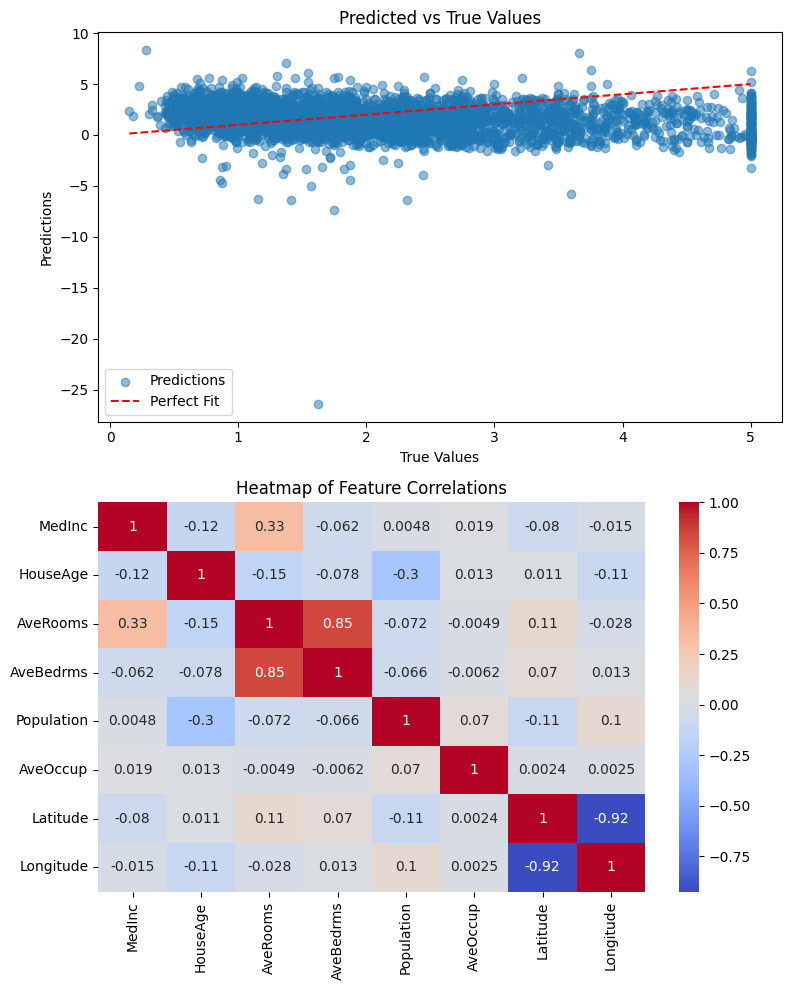

In [19]:
num_epochs = 2000
learning_rate = 0.001
hidden_units = 100  

# Train the model
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, hidden_units, num_epochs, learning_rate)

# Predict on the test set
y_pred, _ = forward_propagation(X_test, W1, b1, W2, b2)
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


plt.figure(figsize=(15, 10))



plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.legend()

plt.subplot(2, 2, 4)
correlation_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=feature_names)
plt.title('Heatmap of Feature Correlations')

plt.tight_layout()
plt.show()